In [304]:
import pandas as pd
import matplotlib.ticker as mtick
from fontTools.misc.py23 import StringIO
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Loading The Dataset

In [305]:
def load_and_convert(filepath, encoding='utf-8'):
    
    # load and separate data into two columns the data
    try:
        data = pd.read_csv(filepath, sep='\s+', header=None, encoding=encoding)
    except UnicodeDecodeError:
        # Fallback if utf-8 doesn't work
        data = pd.read_csv(filepath, sep='\s+', header=None, encoding='ISO-8859-1')
    
    # display the data to check column separation
    print(f"\nPreview of the loaded data from {filepath} (first 5 rows):")
    print(data.head())

    # convert the second column to float
    if data.shape[1] >= 2: 
        try:
            data[1] = pd.to_numeric(data[1], errors='coerce')
        except Exception as e:
            print(f"Error during conversion in {filepath}:", e)
    else:
        print(f"The data in {filepath} might not have separated into two columns as expected.")

    print(f"\nData types after conversion attempt in {filepath}:")
    print(data.dtypes)
    
    return data


In [307]:
# Load and process each dataset
patient1_data = load_and_convert('emg_healthy.txt')
patient2_data = load_and_convert('emg_myopathy.txt')
patient3_data = load_and_convert('emg_neuropathy.txt')


Preview of the loaded data from emg_healthy.txt (first 5 rows):
         0        1
0  0.00025  -0.0333
1  0.00050  -0.0350
2  0.00075  -0.0350
3  0.00100  -0.0300
4  0.00125  -0.0300

Data types after conversion attempt in emg_healthy.txt:
0    float64
1    float64
dtype: object

Preview of the loaded data from emg_myopathy.txt (first 5 rows):
         0        1
0  0.00025  -0.0050
1  0.00050  -0.0100
2  0.00075  -0.0050
3  0.00100  -0.0100
4  0.00125  -0.0067

Data types after conversion attempt in emg_myopathy.txt:
0    float64
1    float64
dtype: object

Preview of the loaded data from emg_neuropathy.txt (first 5 rows):
         0       1
0  0.00025  0.0900
1  0.00050  0.0767
2  0.00075  0.0767
3  0.00100  0.0733
4  0.00125  0.0717

Data types after conversion attempt in emg_neuropathy.txt:
0    float64
1    float64
dtype: object


# Shape of the data before Splitting


In [283]:
# check number of rows and colums before spliitting the data
print(f"Patient 1 shape: {patient1_data.shape}")
print(f"Patient 2 shape: {patient2_data.shape}")
print(f"Patient 3 shape: {patient3_data.shape}")

Patient 1 shape: (50860, 2)
Patient 2 shape: (110337, 2)
Patient 3 shape: (147858, 2)


# Splitting the Datasets according to Training Ratios

In [284]:
# ratios for splitting training data
train_ratio_patient1 = 0.1718
train_ratio_patient2 = 0.3436
train_ratio_patient3 = 0.4847

# splitting data based on the above ratios
train_patient1, test_patient1 = train_test_split( patient1_data, train_size= train_ratio_patient1, random_state = 45)
train_patient2, test_patient2 = train_test_split( patient2_data, train_size= train_ratio_patient2, random_state = 45)
train_patient3, test_patient3 = train_test_split( patient3_data, train_size= train_ratio_patient3, random_state = 45)

# Shape of the Datasets after Splitting the Data

In [285]:
# ratios for train and test splits
train_ratio_patient1 = 0.1718
test_ratio_patient1 = 0.1220

train_ratio_patient2 = 0.3436
test_ratio_patient2 = 0.4146

train_ratio_patient3 = 0.4847
test_ratio_patient3 = 0.4634

# Calculate split indices for each dataset based on train ratios
split_index_train_patient1 = int(len(patient1_data) * train_ratio_patient1)
split_index_test_patient1 = split_index_train_patient1 + int(len(patient1_data) * test_ratio_patient1)

split_index_train_patient2 = int(len(patient2_data) * train_ratio_patient2)
split_index_test_patient2 = split_index_train_patient2 + int(len(patient2_data) * test_ratio_patient2)

split_index_train_patient3 = int(len(patient3_data) * train_ratio_patient3)
split_index_test_patient3 = split_index_train_patient3 + int(len(patient3_data) * test_ratio_patient3)

# Chronologically split each dataset into train and test sets
train_patient1 = patient1_data[:split_index_train_patient1]
test_patient1 = patient1_data[split_index_train_patient1:split_index_test_patient1]

train_patient2 = patient2_data[:split_index_train_patient2]
test_patient2 = patient2_data[split_index_train_patient2:split_index_test_patient2]

train_patient3 = patient3_data[:split_index_train_patient3]
test_patient3 = patient3_data[split_index_train_patient3:split_index_test_patient3]

# Optionally, check the resulting lengths of each set to confirm the split proportions
print(f"Patient 1: Train size = {len(train_patient1)}, Test size = {len(test_patient1)}")
print(f"Patient 2: Train size = {len(train_patient2)}, Test size = {len(test_patient2)}")
print(f"Patient 3: Train size = {len(train_patient3)}, Test size = {len(test_patient3)}")

Patient 1: Train size = 8737, Test size = 6204
Patient 2: Train size = 37911, Test size = 45745
Patient 3: Train size = 71666, Test size = 68517


# Few Data Insights

In [286]:
train_patient1.describe()

,0,1
count,8737.000000,8736.000000
mean,1.092250,0.001643
std,0.630575,0.077039
min,0.000250,-0.396700
25%,0.546250,-0.031700
50%,1.092250,-0.001700
75%,1.638250,0.031700
max,2.184250,0.548300


In [287]:
train_patient2.describe()

,0,1
count,37911.000000,37911.000000
mean,4.739105,0.000754
std,2.736132,0.096143
min,0.000250,-0.598300
25%,2.369625,-0.033300
50%,4.739000,-0.005000
75%,7.108625,0.030000
max,9.478000,0.775000


In [288]:
train_patient3.describe()

,0,1
count,71666.000000,71665.000000
mean,8.971419,-0.016116
std,5.187588,0.433775
min,0.000250,-7.255000
25%,4.479313,-0.023300
50%,8.958375,0.008300
75%,13.478925,0.078300
max,17.958000,3.260000


# Visualizations

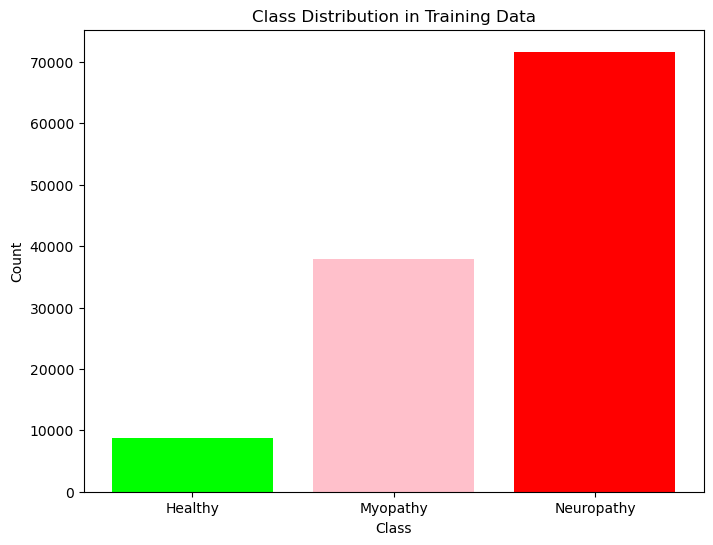

In [289]:
labels = ['Healthy', 'Myopathy', 'Neuropathy']

#class distribution in Training Data

train_counts = [len(train_patient1), len(train_patient2), len(train_patient3)]
plt.figure(figsize=(8, 6))
plt.bar(labels, train_counts, color=['lime', 'pink', 'red'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('class_distribution.png')

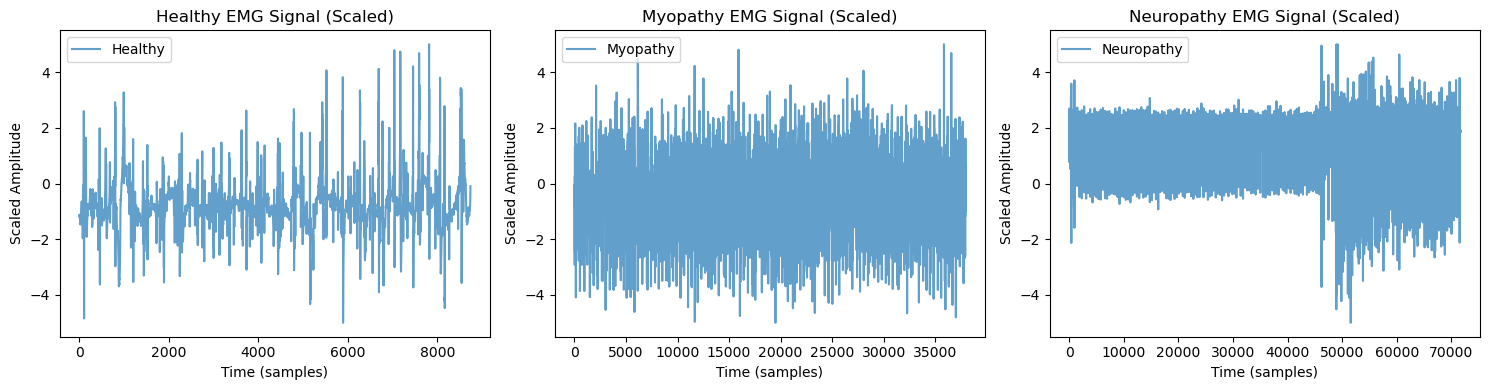

In [290]:
# Initialize the scaler to scale the amplitude values between -1 and 1
scaler = MinMaxScaler(feature_range=(-5, 5))

# figure dimensions
plt.figure(figsize=(15, 4))

# Iterate over each dataset (patient) and label
for i, (data, label) in enumerate(zip([train_patient1, train_patient2, train_patient3], labels), start=1):
    plt.subplot(1, 3, i)
    scaled_data = scaler.fit_transform(data.iloc[:, 1].values.reshape(-1, 1)) 
    plt.plot(scaled_data, label=label, alpha=0.7)
    plt.title(f'{label} EMG Signal (Scaled)')
    plt.xlabel('Time (samples)')
    plt.ylabel('Scaled Amplitude')
    plt.legend()

plt.tight_layout()
plt.savefig('EMG_SIGNAL_PER_PATIENT(All Data Points).png')
plt.show()

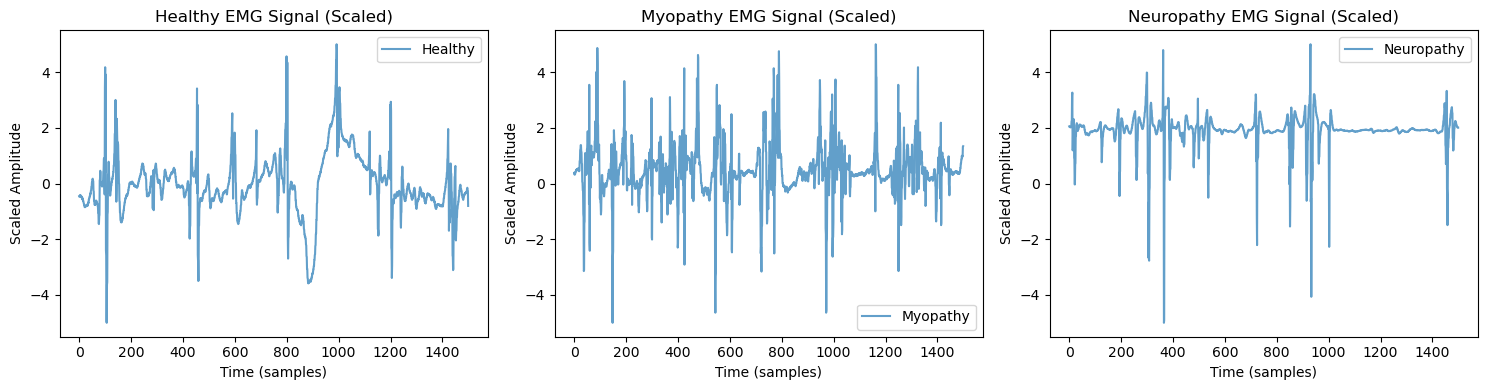

In [291]:
# plot amplitude distribution per class by specifying the sample size
sample_size = 1500
scaler = MinMaxScaler(feature_range=(-5, 5))

plt.figure(figsize=(15, 4))

for i, (data, label) in enumerate(zip([train_patient1, train_patient2, train_patient3], labels), start=1):
    plt.subplot(1, 3, i)
    # Scale the data's amplitude column and plot
    if data.shape[1] > 1:
        scaled_data = scaler.fit_transform(data.iloc[:sample_size, 1].values.reshape(-1, 1))
        plt.plot(scaled_data, label=label, alpha=0.7)
    else:
        scaled_data = scaler.fit_transform(data.iloc[:sample_size, 0].values.reshape(-1, 1))
        plt.plot(scaled_data, label=label, alpha=0.7)

    plt.title(f'{label} EMG Signal (Scaled)')
    plt.xlabel('Time (samples)')
    plt.ylabel('Scaled Amplitude')
    plt.legend()

plt.tight_layout()
plt.savefig('EMG_SIGNAL_PER_PATIENT(flexable Sample Size).png')

In [292]:
print(f"Minimum amplitude for patient 1: {train_patient1.iloc[:, 1].min()}")
print(f"Minimum amplitude for patient 2: {train_patient2.iloc[:, 1].min()}")
print(f"Minimum amplitude for patient 3: {train_patient3.iloc[:, 1].min()}")

Minimum amplitude for patient 1: -0.3967
Minimum amplitude for patient 2: -0.5983
Minimum amplitude for patient 3: -7.255


In [293]:
print(f"Maximum Amplitude for patient 1: {train_patient1.iloc[:, 1].max()}")
print(f"Maximum Amplitude for patient 2: {train_patient2.iloc[:, 1].max()}")
print(f"Maximum Amplitude for patient 3: {train_patient3.iloc[:, 1].max()}")

Maximum Amplitude for patient 1: 0.5483
Maximum Amplitude for patient 2: 0.775
Maximum Amplitude for patient 3: 3.26


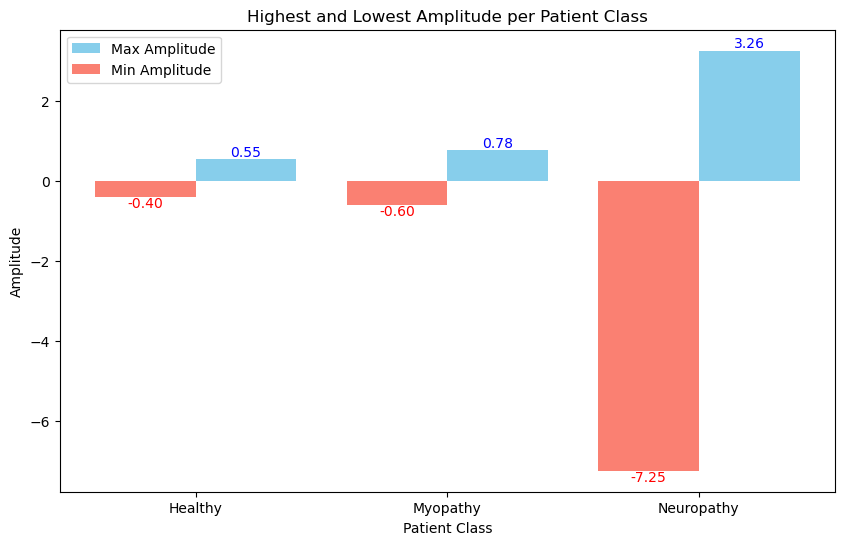

[-0.3967, -0.5983, -7.255]


In [294]:
# Calculate min and max amplitude values for each patient
patients = [train_patient1, train_patient2, train_patient3]
labels = ["Healthy", "Myopathy", "Neuropathy"]

# lists to store min and max amplitude values
min_amplitudes = []
max_amplitudes = []

# Loop through each patient's data
for patient in patients:
    min_amplitude = float(patient.iloc[:, 1].min())  # Adjust column index if needed
    max_amplitude = float(patient.iloc[:, 1].max())  # Adjust column index if needed
    min_amplitudes.append(min_amplitude)
    max_amplitudes.append(max_amplitude)

# Define positions for the bars
x = range(len(labels))

plt.figure(figsize=(10, 6))

# Plot max amplitudes as bars 
max_bars = plt.bar([i + 0.2 for i in x], max_amplitudes, width=0.4, label='Max Amplitude', color='skyblue')

# Plot min amplitudes as bars 
min_bars = plt.bar([i - 0.2 for i in x], min_amplitudes, width=0.4, label='Min Amplitude', color='salmon')

# Add labels, title, and legend
plt.xlabel('Patient Class')
plt.ylabel('Amplitude')
plt.title('Highest and Lowest Amplitude per Patient Class')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Add amplitude value labels on top of the bars
for i, (max_bar, min_bar) in enumerate(zip(max_bars, min_bars)):
    # Max amplitude label (on positive side)
    plt.text(max_bar.get_x() + max_bar.get_width() / 2, max_amplitudes[i],
             f'{max_amplitudes[i]:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    # Min amplitude label (on negative side)
    plt.text(min_bar.get_x() + min_bar.get_width() / 2, min_amplitudes[i],
             f'{min_amplitudes[i]:.2f}', ha='center', va='top', fontsize=10, color='red')

# Save and show the plot
plt.savefig('Patient_Amplitude_Extremes_Positive_and_Negative.png')
plt.show()

print(min_amplitudes )

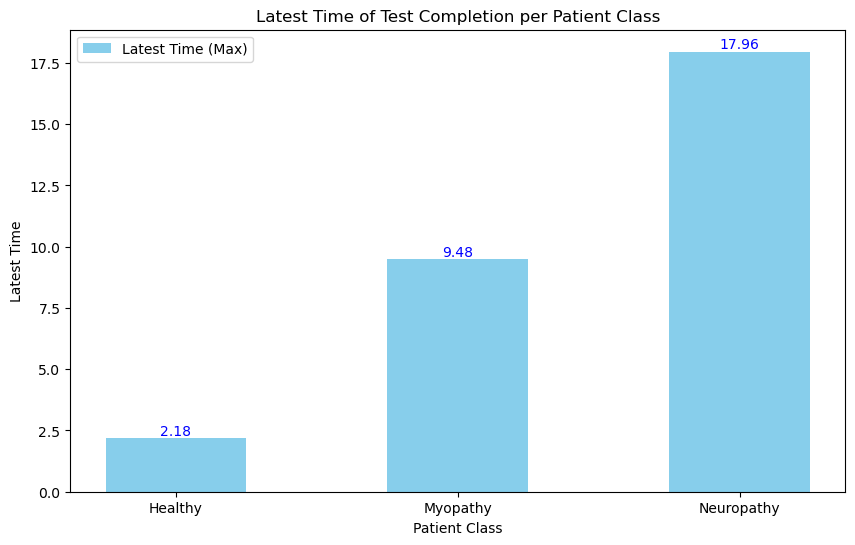

In [295]:
# Calculate the maximum time values (latest time) for each patient
patients = [train_patient1, train_patient2, train_patient3]
labels = ["Healthy", "Myopathy", "Neuropathy"]

# List to store the max time values
max_times = [float(patient.iloc[:, 0].max()) for patient in patients]  # Using the first column for time

x = range(len(labels))

plt.figure(figsize=(10, 6))
max_bars = plt.bar(x, max_times, width=0.5, color='skyblue', label='Latest Time (Max)')
plt.xlabel('Patient Class')
plt.ylabel('Latest Time')
plt.title('Latest Time of Test Completion per Patient Class')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# adding time value labels on top of the bars
for i, max_bar in enumerate(max_bars):
    plt.text(max_bar.get_x() + max_bar.get_width() / 2, max_times[i],
             f'{max_times[i]:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

plt.savefig('Patient_Latest_Test_Times.png')
plt.show()

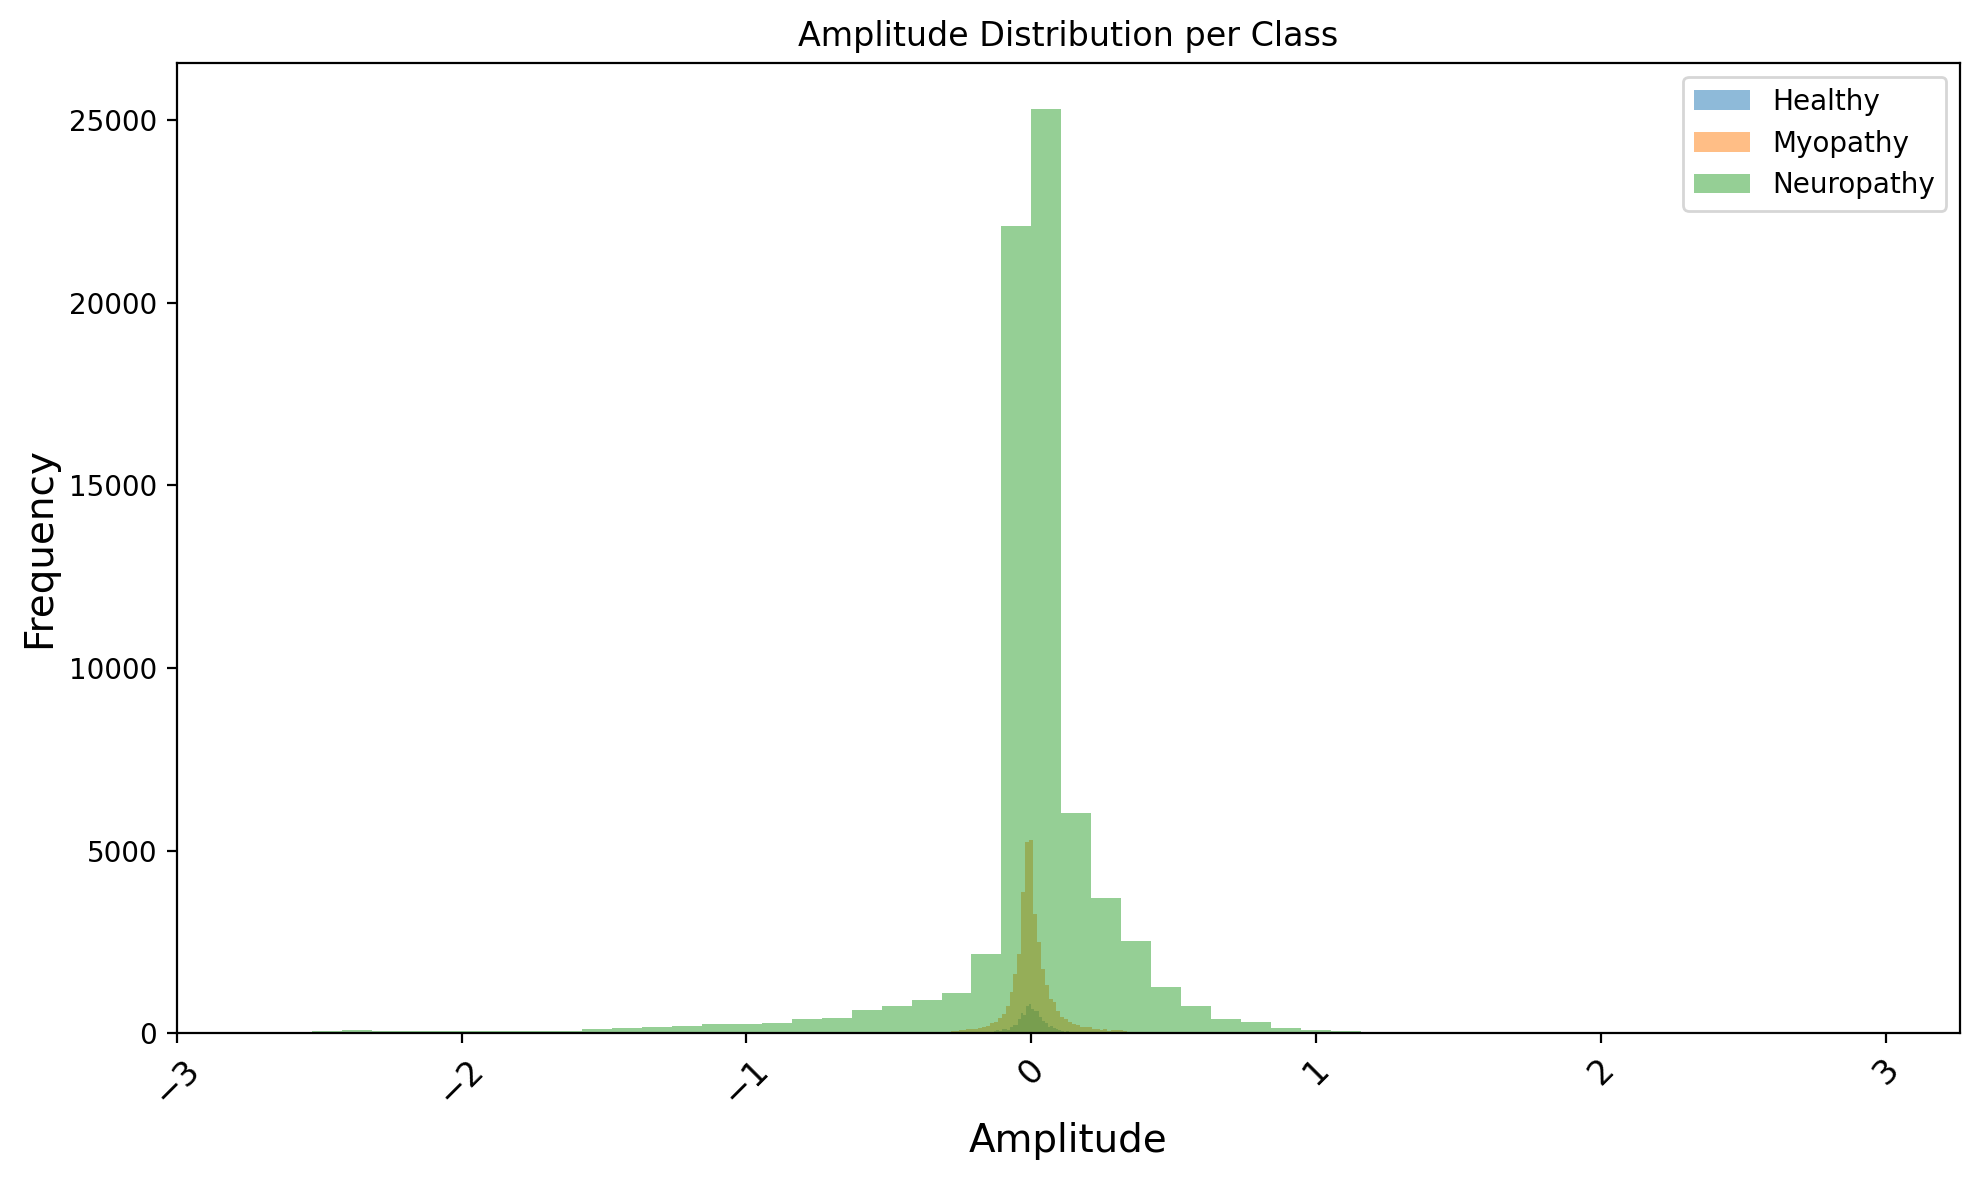

In [296]:
# Convert to numeric and handle non-numeric values
train_patient1.iloc[:, 1] = pd.to_numeric(train_patient1.iloc[:, 1], errors='coerce')
train_patient2.iloc[:, 1] = pd.to_numeric(train_patient2.iloc[:, 1], errors='coerce')
train_patient3.iloc[:, 1] = pd.to_numeric(train_patient3.iloc[:, 1], errors='coerce')

# maximum value of all patients' data 
max_val = max(train_patient1.iloc[:, 1].max(), train_patient2.iloc[:, 1].max(), train_patient3.iloc[:, 1].max())

x_start = -3  
x_end = max_val 

step_size = 1  

# Plotting the histograms for each patient
plt.figure(figsize=(10, 6), dpi=200)
plt.hist(train_patient1.iloc[:, 1], bins=100, alpha=0.5, label='Healthy')
plt.hist(train_patient2.iloc[:, 1], bins=100, alpha=0.5, label='Myopathy')
plt.hist(train_patient3.iloc[:, 1], bins=100, alpha=0.5, label='Neuropathy')

plt.title('Amplitude Distribution per Class')
plt.xlabel('Amplitude', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim([x_start, x_end])
plt.xticks(np.arange(x_start, x_end, step_size), rotation=45, fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('Amplitude_Distribution_PER_Class.png')
plt.show()

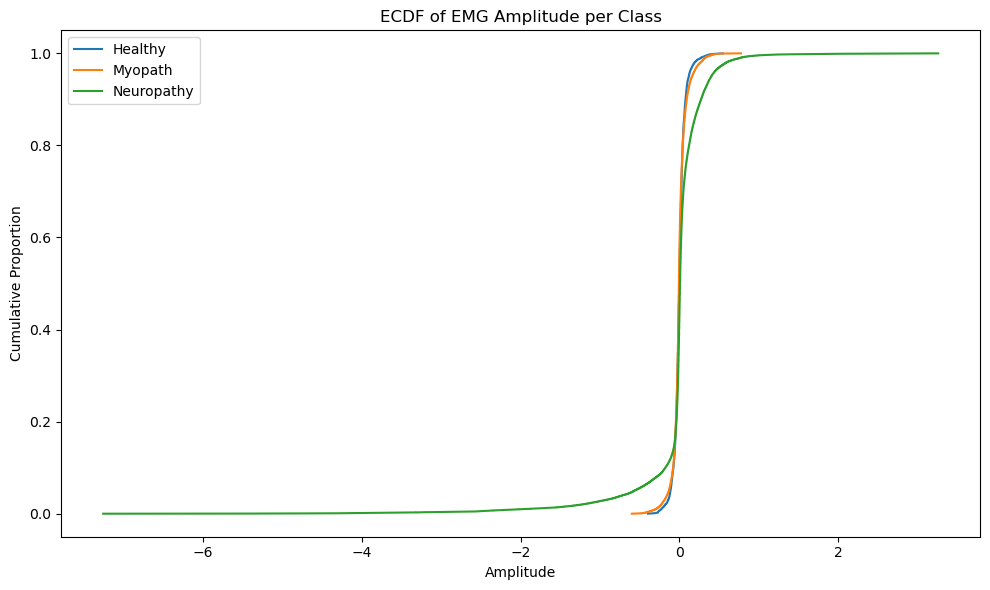

In [308]:
def plot_ecdf(data, label):
    # sort data and compute the ECDF values
    sorted_data = np.sort(data)
    y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, y_vals, label=label)

plt.figure(figsize=(10, 6))
plot_ecdf(train_patient1.iloc[:, 1], 'Healthy')
plot_ecdf(train_patient2.iloc[:, 1], 'Myopath')
plot_ecdf(train_patient3.iloc[:, 1], 'Neuropathy')
plt.title('ECDF of EMG Amplitude per Class')
plt.xlabel('Amplitude')
plt.ylabel('Cumulative Proportion')
plt.legend()
plt.tight_layout()
plt.show()



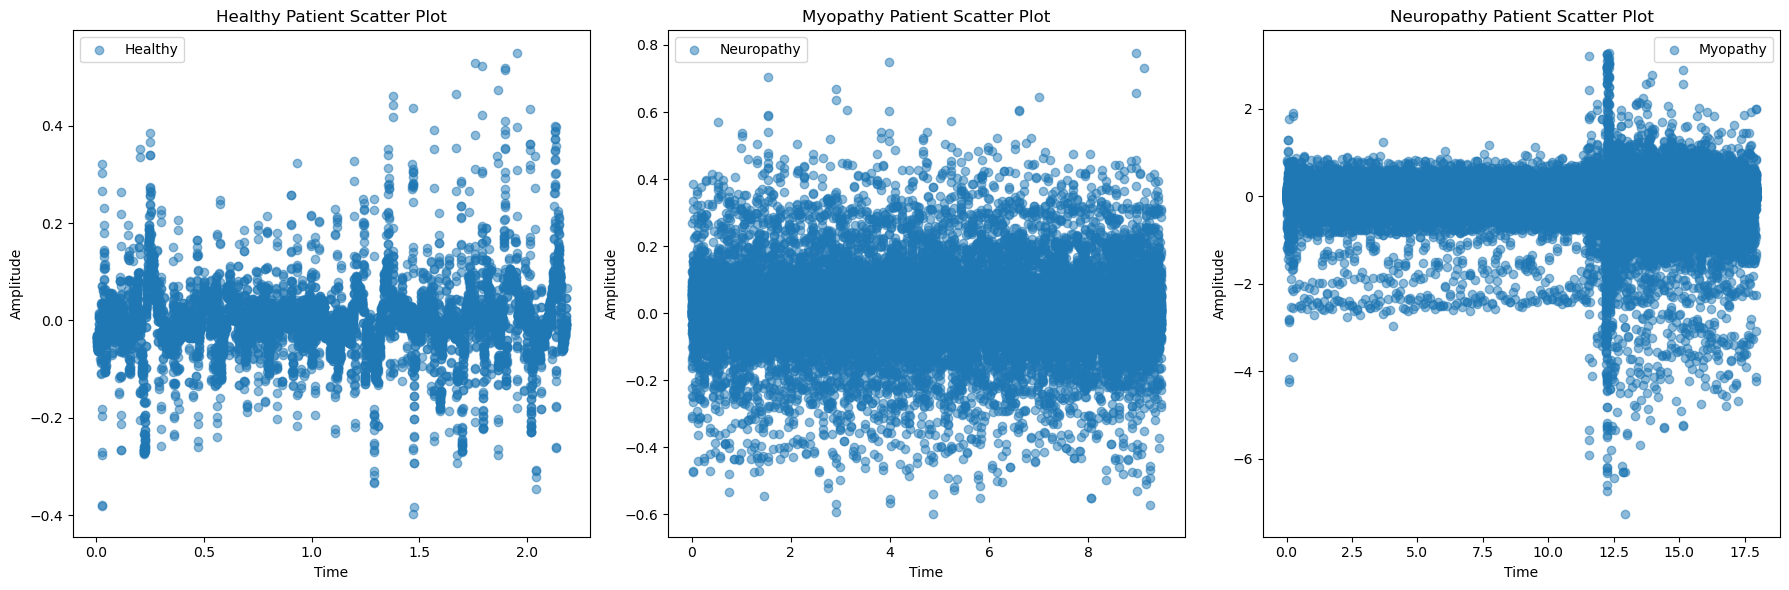

In [298]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Healthy
axs[0].scatter(train_patient1.iloc[:, 0], train_patient1.iloc[:, 1], label='Healthy', alpha=0.5)
axs[0].set_title('Healthy Patient Scatter Plot')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot for Myopathy
axs[1].scatter(train_patient2.iloc[:, 0], train_patient2.iloc[:, 1], label='Neuropathy', alpha=0.5)
axs[1].set_title('Myopathy Patient Scatter Plot')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Plot for Neuropathy
axs[2].scatter(train_patient3.iloc[:, 0], train_patient3.iloc[:, 1], label='Myopathy', alpha=0.5)
axs[2].set_title('Neuropathy Patient Scatter Plot')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.tight_layout()
plt.show()

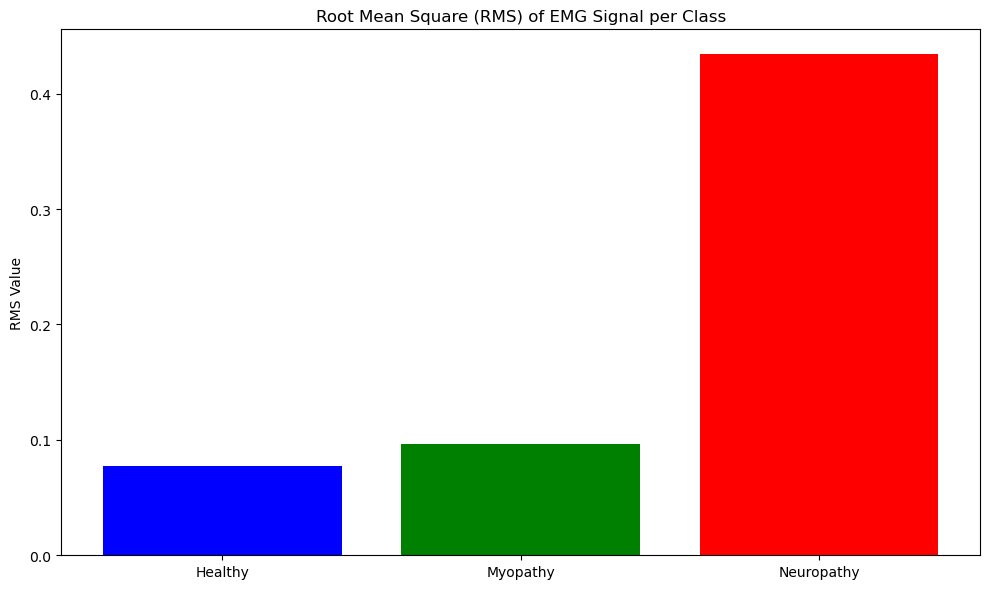

In [309]:
# Root Mean Square (RMS) of EMG signal
# The root-mean-square (RMS) of an electromyographic (EMG) signal is a measurement of the signal's power, 
# which provides insight into its amplitude. It's a common parameter used to assess the level of muscle activation
# caused by the central nervous system (CNS).

def compute_rms(data):
    return np.sqrt(np.mean(data**2))

rms_healthy = compute_rms(train_patient1.iloc[:, 1])
rms_neuropathy = compute_rms(train_patient2.iloc[:, 1])
rms_myopathy = compute_rms(train_patient3.iloc[:, 1])

# Plotting RMS values
plt.figure(figsize=(10, 6))
plt.bar(['Healthy', 'Myopathy', 'Neuropathy'], [rms_healthy, rms_neuropathy, rms_myopathy], color=['blue', 'green', 'red'])
plt.title('Root Mean Square (RMS) of EMG Signal per Class')
plt.ylabel('RMS Value')
plt.tight_layout()
plt.show()

/tmp/ipykernel_7367/1417300102.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


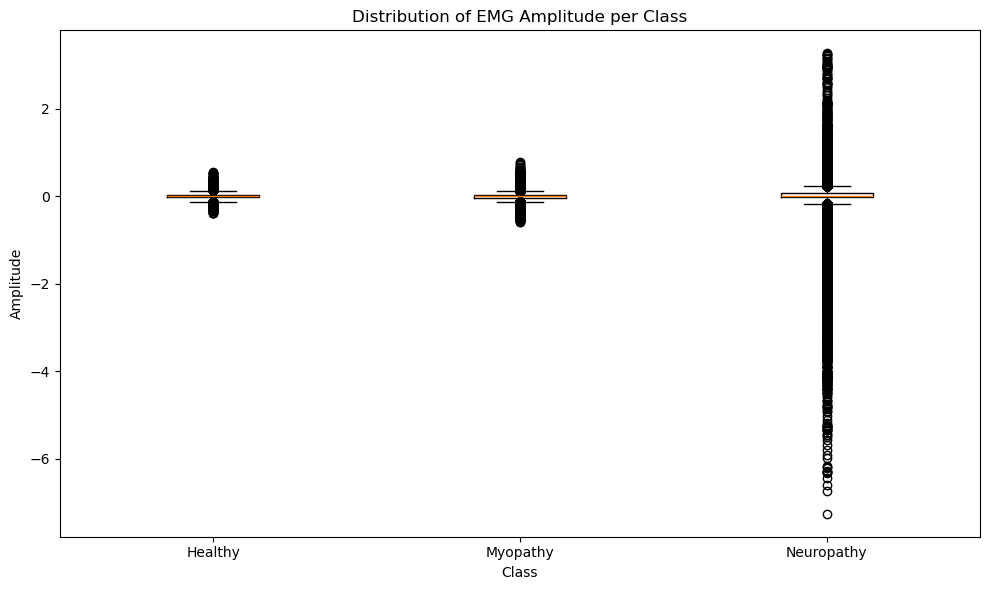

In [313]:
# Visualize the box plots 
plt.figure(figsize=(10, 6))
plt.boxplot(
    [train_patient1.iloc[:, 1].dropna(), train_patient2.iloc[:, 1].dropna(), train_patient3.iloc[:, 1].dropna()],
    labels=['Healthy', 'Myopathy', 'Neuropathy']
)
plt.title('Distribution of EMG Amplitude per Class')
plt.xlabel('Class')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()